In [1]:
import pandas as pd
import numpy as np

In [2]:
# !python -m pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

DEPRECATION: sqlalchemy-mate 1.4.28.3 has a non-standard dependency specifier sqlalchemy>=1.4.1<2.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of sqlalchemy-mate or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
demand_history = pd.read_csv("dataset/Biomass_History.csv")
demand_history.head()

Index  Latitude  Longitude       2010       2011       2012       2013  \
0      0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1      1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2      2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3      3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4      4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   

        2014       2015       2016        2017  
0  10.788374   6.647325   7.387925    5.180296  
1  34.419411  27.361908  40.431847   42.126945  
2  70.917908  42.517117  59.181629   73.203232  
3  93.513924  70.203171  74.536720  101.067352  
4  19.534035  19.165791  16.531315   26.086885

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(demand_history.iloc[0][3:])

(-2.8939303316044955,
 0.046058383726039966,
 0,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 23.087836696094037)

In [15]:
years = demand_history.columns[3:]

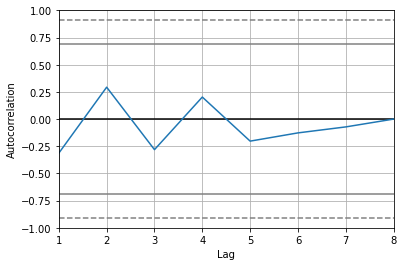

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(demand_history.iloc[0][3:])
plt.show()

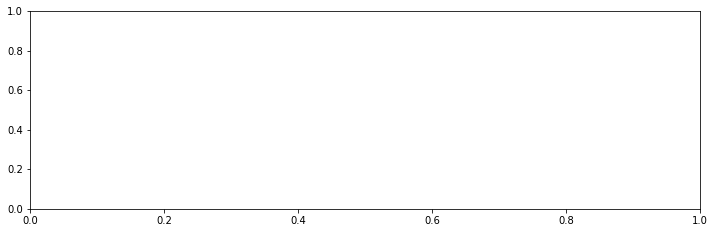

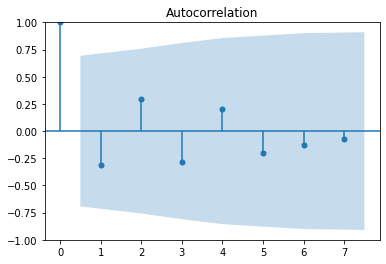

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(demand_history.iloc[0][3:])

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(demand_history.iloc[0][3:],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -14.390
Date:                Sat, 05 Aug 2023   AIC                             34.781
Time:                        20:24:06   BIC                             34.619
Sample:                    01-01-2010   HQIC                            32.775
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6004      0.438     -1.372      0.170      -1.458       0.258
ma.L1         -0.2931      0.552     -0.531      0.596      -1.376       0.790
sigma2         3.1602      2.780      1.137      0.256      -2.288       8.609
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.37   Prob(JB):                         0.77
Heteroskedasticity (H):              21.16   Skew:                             0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         1.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model_fit.predict(start=0,end=8)

2010-01-01    0.000000
2011-01-01    8.475700
2012-01-01    8.581490
2013-01-01    8.828210
2014-01-01    8.750973
2015-01-01    7.330130
2016-01-01    9.333861
2017-01-01    7.513678
2018-01-01    7.189813
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(demand_history.iloc[0][3:],model_fit.predict(start=0,end=7))

32.28600410804936

In [21]:
demand_history[2018] = 0
demand_history[2019] = 0

In [23]:
model_fit.predict(start=7,end=9)

2017-01-01    7.513678
2018-01-01    7.189813
2019-01-01    5.983251
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [26]:
demand_history.loc[2018,0],demand_history.loc[2019,0] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]

In [36]:
demand_history.loc[0,2018] = model_fit.predict(start=9,end=10).iloc[0]

In [37]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013  \
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017      2018    2019   0  
0     10.788374   6.647325   7.387925    5.180296  5.983251  6.7077 NaN  
1     34.419411  27.361908  40.431847   42.126945  0.000000  0.0000 NaN  
2     70.917908  42.517117  59.181629   73.203232  0.000000  0.0000 NaN  
3     93.513924  70.203171  74.536720  101.067352  0.000000  0.0000 NaN  
4     19.534035  19.165791  16.531315   26.086885  0.000000  0.0000 NaN  
...         ...        ...        ...         ...       ...     ...  ..  
2413   5.113997   5.301668   6.419223    5.321604  0.000000  0.0000 NaN  
2414   0.121749   0.122467   0.145785    0.120626  0.000000  0.0000 NaN  
2415   0.039241   0.039473   0.046989    0.038879  0.000000  0.0000 NaN  
2416   1.316443   1.324201   1.576338    1.304297  0.000000  0.0000 NaN  
2417   0.229067   0.230417   0.274289    0.226953  0.000000  0.0000 NaN  

[2418 rows x 14 columns]

In [38]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
demand_history.loc[0,2018],demand_history.loc[0,2018] = model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

In [39]:
model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

(7.51367752099229, 5.9832506877330065)

In [40]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
for i in range(len(demand_history)):
    model=ARIMA(demand_history.iloc[i][3:],order=(1,1,1))
    model_fit=model.fit()
    demand_history.loc[i,2018],demand_history.loc[i,2019] = model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and 

In [41]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013  \
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017       2018       2019   0  
0     10.788374   6.647325   7.387925    5.180296   7.483670   5.837380 NaN  
1     34.419411  27.361908  40.431847   42.126945  47.519392  -5.522590 NaN  
2     70.917908  42.517117  59.181629   73.203232  57.071377  23.667258 NaN  
3     93.513924  70.203171  74.536720  101.067352  74.989417  31.017123 NaN  
4     19.534035  19.165791  16.531315   26.086885  17.522164   8.424259 NaN  
...         ...        ...        ...         ...        ...        ...  ..  
2413   5.113997   5.301668   6.419223    5.321604   7.138430  -0.167584 NaN  
2414   0.121749   0.122467   0.145785    0.120626   0.150970  -0.028169 NaN  
2415   0.039241   0.039473   0.046989    0.038879   0.048699  -0.009184 NaN  
2416   1.316443   1.324201   1.576338    1.304297   1.700111  -0.599753 NaN  
2417   0.229067   0.230417   0.274289    0.226953   0.299213  -0.138833 NaN  

[2418 rows x 14 columns]

In [6]:
! python -m pip install prophet

DEPRECATION: sqlalchemy-mate 1.4.28.3 has a non-standard dependency specifier sqlalchemy>=1.4.1<2.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of sqlalchemy-mate or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [10]:
!pip install prophet --no-binary :all:

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 45.9/45.9 kB 565.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for fbprophet
  Created wheel for cmdstanpy: filename=cmdstanpy-0.9.5-py3-none-any.whl size=36679 sha256=6a4f554aeee90a959c647718acffd379176f5cd1a730863605dfb9fbc4569f1d
  Stored in directory: c:\users\apr\appdata\local\pip\cache\wheels\6d\29\11\acbb17a529e19557d20723038a1b8d7b068805959c04128812
Successfully built cmdstanpy
Failed to build fbprophet


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [328 lines of output]
  --- Logging error ---
  Traceback (most recent call last):
    File "C:\Users\apr\AppData\Local\Programs\Python\Python37\lib\logging\__init__.py", line 1028, in emit
      stream.write(msg + self.terminator)
  ValueError: underlying buffer has been detached
  Call stack:
    File "<string>", line 36, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\apr\AppData\Local\Temp\pip-install-qnuj2su9\fbprophet_5bcbb85d83b34598a0e5bf50bc1dd588\setup.py", line 149, in <module>
      long_description_content_type='text/markdown',
    File "C:\Users\apr\AppData\Local\Programs\Python\Python37\lib\site-packages\setuptools\__init__.py", line 87, in setup
      return distutils.core.setup(**attrs)
    File "C:\Users\apr\AppData\Local\Programs\Python\Python37\lib\site-packages\setuptools\_distutils\core.py", line 185, in setup

In [43]:
demand_history.to_csv('forecast_arima_2018-19.csv',index=False)